In [460]:
import pandas as pd
from matplotlib import pyplot as plt, ticker

In [461]:
def million_formatter(x, pos):
    return "%.0f M" % (x/1E6)

### Importando os dados de exportação de vinhos

In [462]:
expVinho = pd.read_csv("data/ExpVinho.csv", sep=";", thousands=".", decimal=",")
expVinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Criando o Dataframe de valores em Litros

In [463]:
expVinhoLitros = pd.concat([expVinho["País"], expVinho[expVinho.iloc[:,0::2].columns]], axis=1)
expVinhoLitros.set_index("País", inplace=True)
expVinhoLitros = expVinhoLitros.iloc[:,-15:] # ultimos 15 anos
expVinhoLitros['Total'] = expVinhoLitros.sum(numeric_only=True, axis=1)
expVinhoLitros.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,11
África do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117,147
"Alemanha, República Democrática",225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,648115
Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,143147
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Criando o Dataframe de valores em USS

In [464]:
expVinhoValor = expVinho.iloc[:,1::2]
expVinhoValor.columns = expVinhoValor.columns.str[0:4] # remove o .1 do nome da coluna
expVinhoValor.set_index("País", inplace=True)
expVinhoValor = expVinhoValor.iloc[:,-15:] # ultimos 15 anos
expVinhoValor['Total'] = expVinhoValor.sum(numeric_only=True, axis=1)
expVinhoValor.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,46
África do Sul,0,0,0,0,0,0,0,0,0,0,95,21,0,0,698,814
"Alemanha, República Democrática",393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,2148277
Angola,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,505106
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Top 10 exportações do Brasil em litros

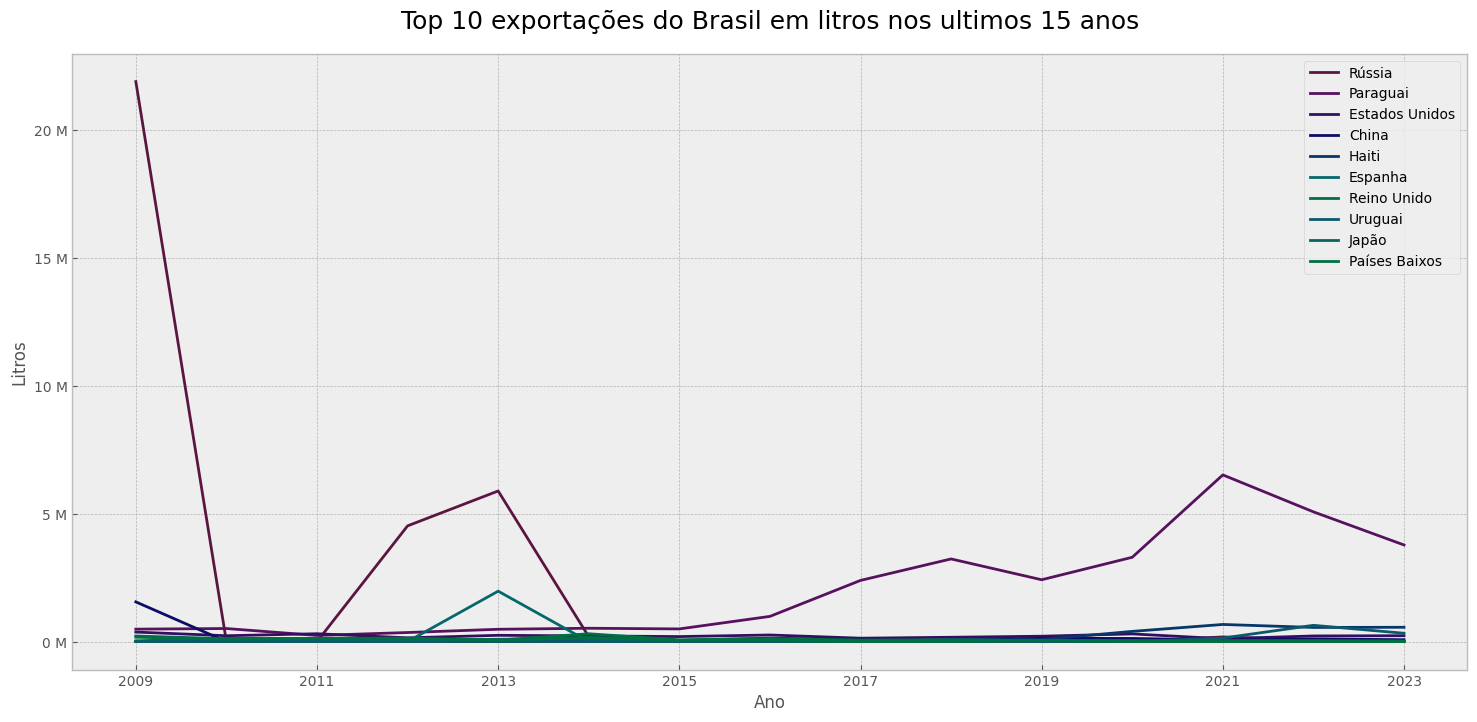

In [465]:
df_plot_l = expVinhoLitros.sort_values(by="Total", ascending=False).head(10).iloc[: , :-1].T.iloc[0:] # remove a coluna total

plt.style.use("bmh")

colors = ['#5a1640', '#57125e', '#340f61', '#0b0d65', '#073769', '#04676c', '#007041', '#0a596c', '#08645f', '#007041']

axis = df_plot_l.plot(figsize=(18,8), color = colors)
axis.yaxis.set_major_formatter(million_formatter)
axis.set_xlabel('Ano')
axis.set_ylabel('Litros')
title_obj = plt.title("Top 10 exportações do Brasil em litros nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')

plt.savefig('1.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()

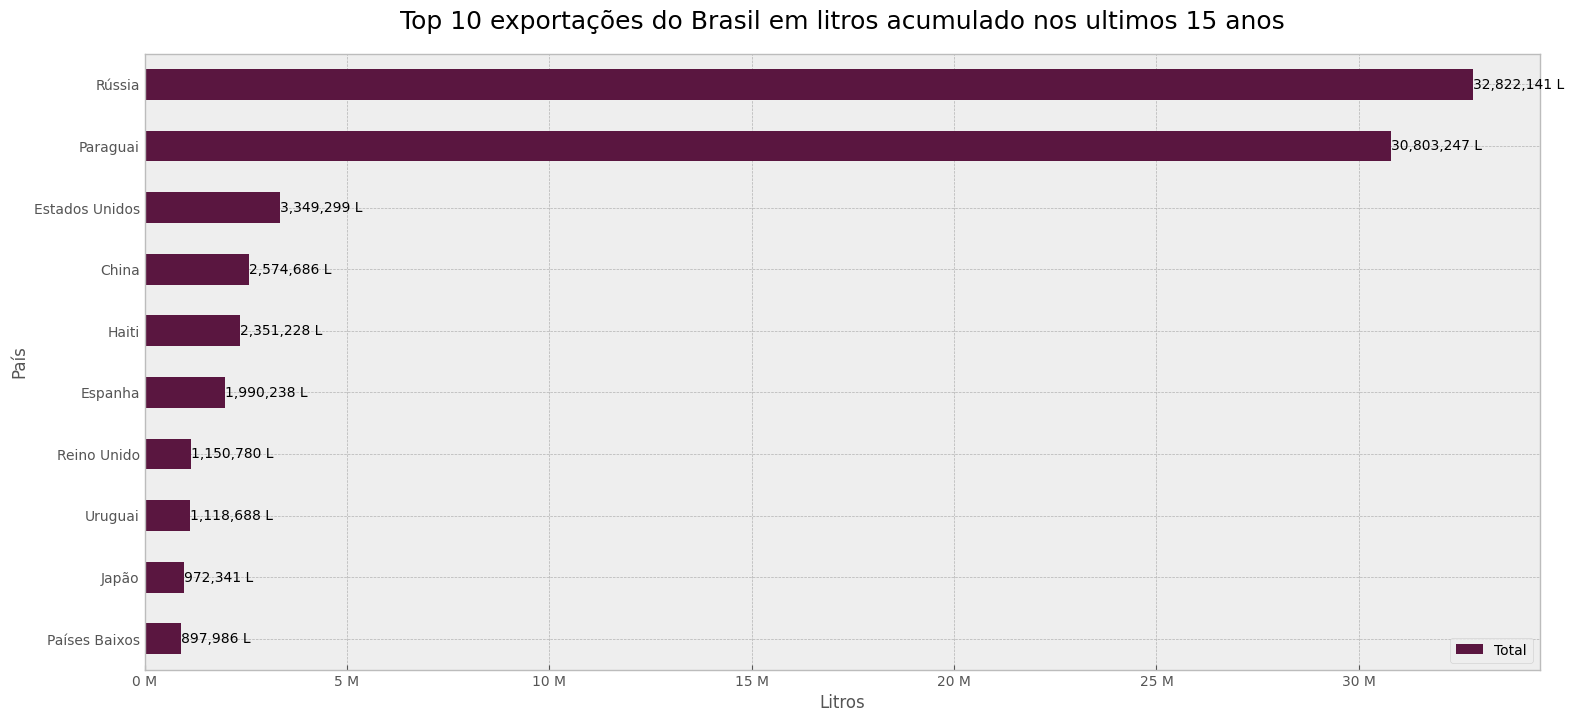

In [466]:
df_plot_lt = expVinhoLitros.sort_values(by="Total", ascending=False).head(10)
new_df_lt = pd.concat([df_plot_lt.iloc[:,0:0],df_plot_lt.iloc[:,-1:]],axis = 1).iloc[::-1]

colors = ['#5a1640', '#41265d', '#233657', '#223b42', '#2a3b36', '#353932', '#383838', '#120a8f', '#191970', '#8b008b']

axis = new_df_lt.plot.barh(figsize=(18,8), color=colors)
axis.xaxis.set_major_formatter(million_formatter)
axis.set_ylabel('País') 
axis.set_xlabel('Litros') 
title_obj = plt.title("Top 10 exportações do Brasil em litros acumulado nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')
# texto para cada barra
axis.bar_label(axis.containers[0], fmt='{:,.0f} L', color='black')

plt.savefig('2.png', bbox_inches='tight', edgecolor='none', facecolor='white')


plt.show()

### Top 10 exportações do Brasil em USS

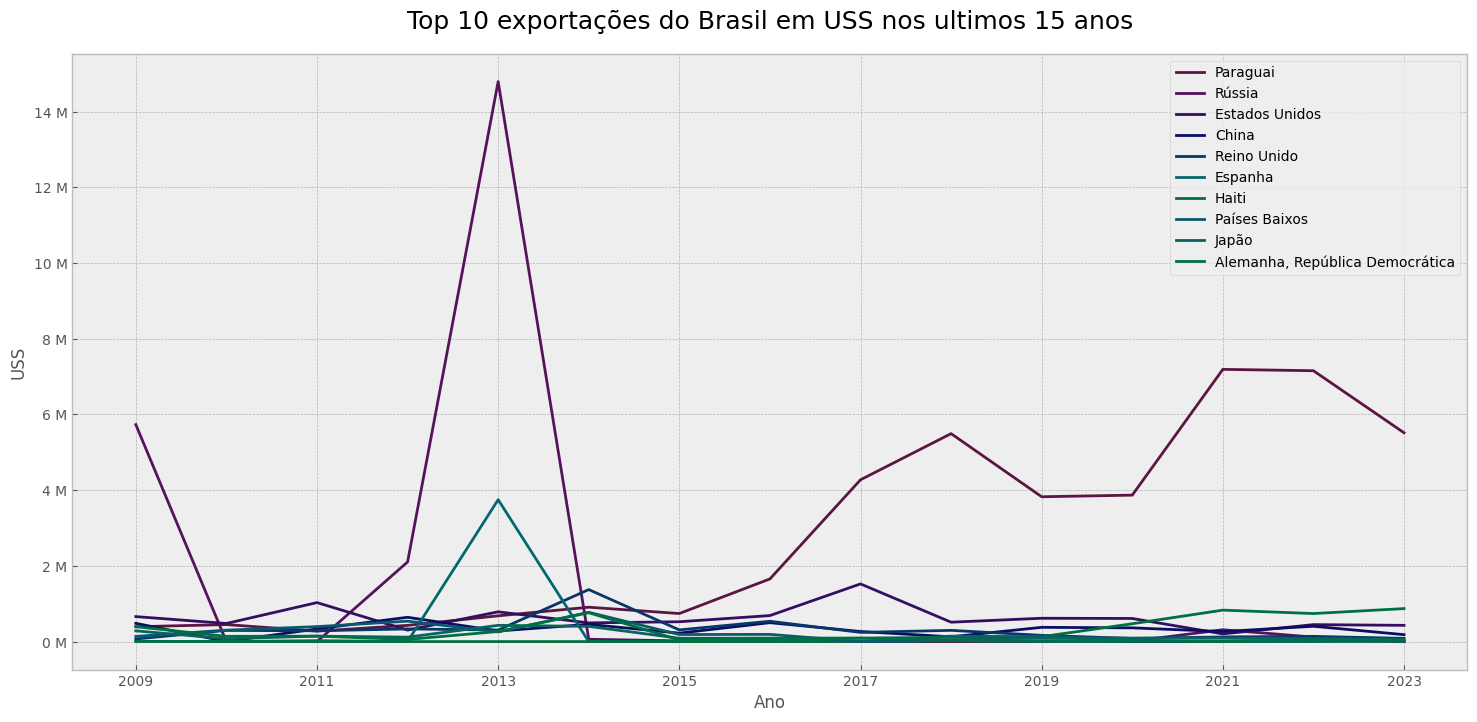

In [467]:
df_plot_v = expVinhoValor.sort_values(by="Total", ascending=False).head(10).iloc[: , :-1].T.iloc[0:] # remove a coluna total

colors = ['#5a1640', '#57125e', '#340f61', '#0b0d65', '#073769', '#04676c', '#007041', '#0a596c', '#08645f', '#007041']

axis = df_plot_v.plot(figsize=(18,8), color=colors)
axis.yaxis.set_major_formatter(million_formatter)
axis.set_xlabel('Ano', fontsize=12)
axis.set_ylabel('USS', fontsize=12)
title_obj = plt.title("Top 10 exportações do Brasil em USS nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black')
plt.legend(labelcolor='black')

plt.savefig('3.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()

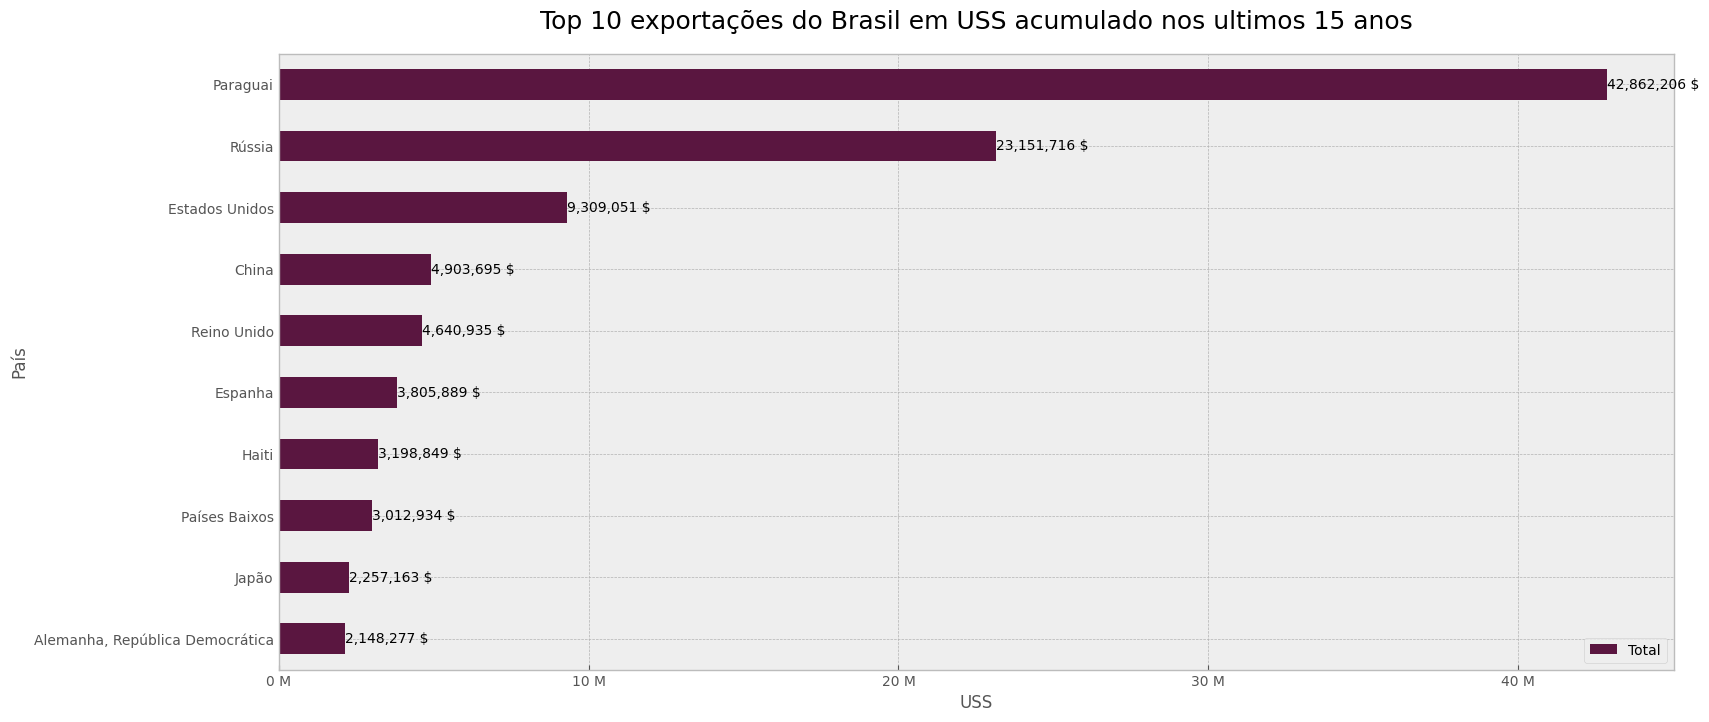

In [468]:
df_plot_vt = expVinhoValor.sort_values(by="Total", ascending=False).head(10)
new_df_vt = pd.concat([df_plot_vt.iloc[:,0:0],df_plot_vt.iloc[:,-1:]],axis = 1).iloc[::-1]

colors = ['#5a1640', '#41265d', '#233657', '#223b42', '#2a3b36', '#353932', '#383838', '#120a8f', '#191970', '#8b008b']
axis = new_df_vt.plot.barh(figsize=(18,8), color=colors)
axis.xaxis.set_major_formatter(million_formatter)
axis.set_ylabel('País') 
axis.set_xlabel('USS') 
title_obj = plt.title("Top 10 exportações do Brasil em USS acumulado nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')
# texto para cada barra
axis.bar_label(axis.containers[0], fmt='{:,.0f} $', color='black')

plt.savefig('4.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()

### Preço por Litro

In [469]:
expPrecoLitro = (expVinhoValor / expVinhoLitros).fillna(0)
expPrecoLitro.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.181818,0.000000,0.000000,4.181818
África do Sul,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.653846,5.250000,0.000000,0.000000,5.965812,5.537415
"Alemanha, República Democrática",1.748141,5.003283,3.996396,6.880205,4.310896,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517,5.945872,6.627757,3.314654
Angola,1.537528,5.658760,4.968032,3.127780,5.912270,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,0.000000,0.000000,1.170354,0.000000,3.528583
Anguilla,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


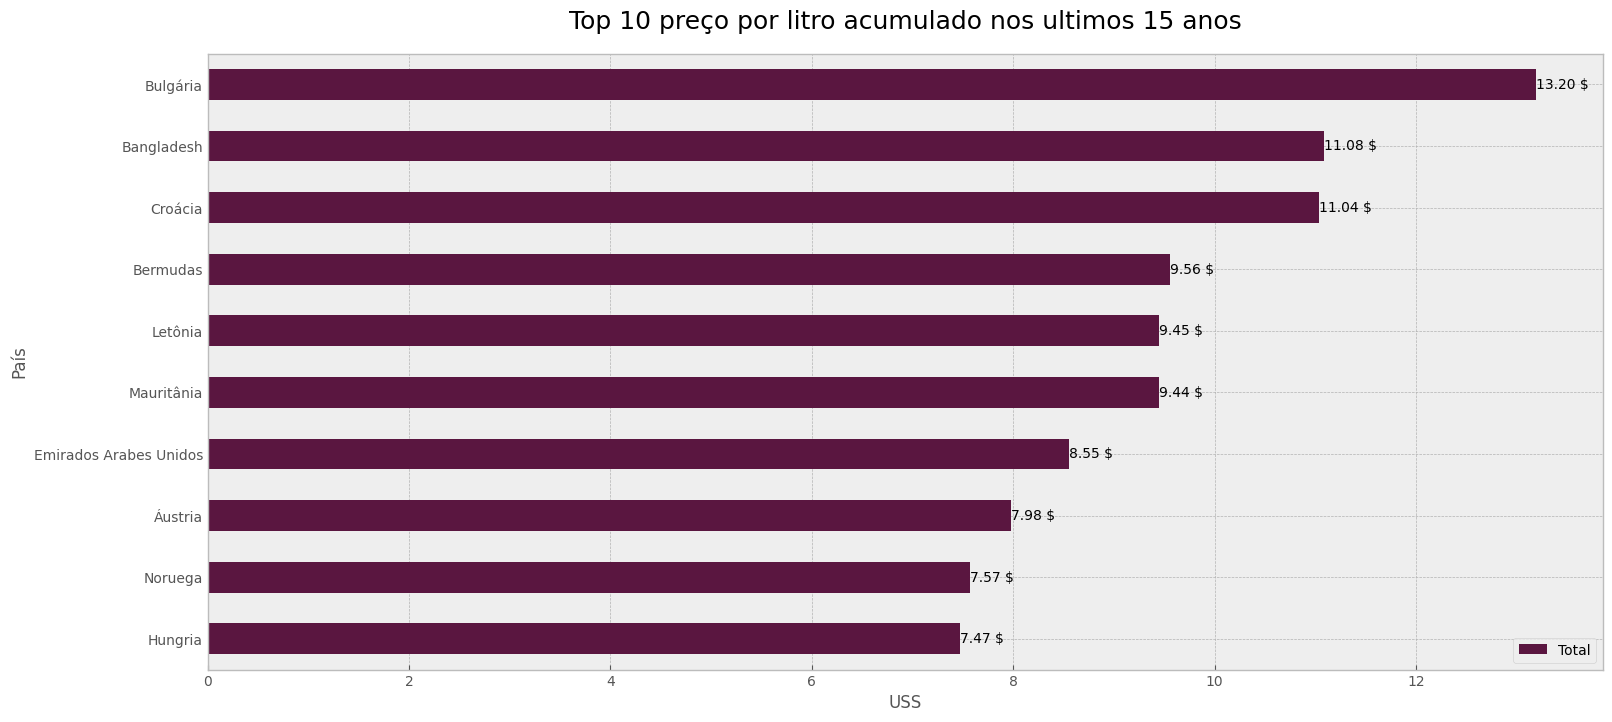

In [470]:
df_plot_pl = expPrecoLitro.sort_values(by="Total", ascending=False).head(10)
new_df_pl = pd.concat([df_plot_pl.iloc[:,0:0],df_plot_pl.iloc[:,-1:]],axis = 1).iloc[::-1]

colors = ['#5a1640', '#41265d', '#233657', '#223b42', '#2a3b36', '#353932', '#383838', '#120a8f', '#191970', '#8b008b']
axis = new_df_pl.plot.barh(figsize=(18,8), color=colors)
#axis.xaxis.set_major_formatter(million_formatter)
axis.set_ylabel('País') 
axis.set_xlabel('USS') 
title_obj = plt.title("Top 10 preço por litro acumulado nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')
# texto para cada barra
axis.bar_label(axis.containers[0], fmt='{:,.2f} $', color='black')

plt.savefig('5.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()

### Contruir uma tabela contendo as seguintes informações
- País de origem (Brasil)
- País de destino
- Quantidade em litros de vinho exportado (1kg = 1L)
- Valor em US$
- Preço por litro

In [471]:
df_total_litros = pd.concat([expVinhoLitros.iloc[:,0:0],expVinhoLitros.iloc[:,-1:]],axis = 1).iloc[::-1]
df_total_valor = pd.concat([expVinhoValor.iloc[:,0:0],expVinhoValor.iloc[:,-1:]],axis = 1).iloc[::-1]
df_total_precoLitro = pd.concat([expPrecoLitro.iloc[:,0:0],expPrecoLitro.iloc[:,-1:]],axis = 1).iloc[::-1]
df_merge = pd.merge(df_total_litros, df_total_valor, left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_total_precoLitro, left_index=True, right_index=True)
df_merge = df_merge.reset_index()
df_merge.columns = ['País de Destino', 'Valor em USS', 'Quantidade em Litros', 'Preço por Litro']
df_merge['País de Origem'] = 'Brasil'
df_merge = df_merge[['País de Origem', 'País de Destino', 'Quantidade em Litros', 'Valor em USS', 'Preço por Litro']]

df_merge.sort_values(by="Preço por Litro", ascending=False).head(20)


,País de Origem,País de Destino,Quantidade em Litros,Valor em USS,Preço por Litro
113,Brasil,Bulgária,1610,122,13.196721
123,Brasil,Bangladesh,133,12,11.083333
96,Brasil,Croácia,607,55,11.036364
117,Brasil,Bermudas,153,16,9.562500
57,Brasil,Letônia,3731,395,9.445570
47,Brasil,Mauritânia,85,9,9.444444
90,Brasil,Emirados Arabes Unidos,139307,16292,8.550638
125,Brasil,Áustria,5432,681,7.976505
40,Brasil,Noruega,266695,35216,7.573120
69,Brasil,Hungria,4686,627,7.473684


### Analisando dados dos ultimos 15 anos de outros países utilizando o site OIV

In [472]:
oivVinho = pd.read_csv("data/oiv.csv", sep=",", thousands=".", decimal=",", skipfooter=2, encoding="ISO-8859-1", engine='python')
oivVinho["Quantity"] = oivVinho["Quantity"].str.replace(" ", "").astype(int)
oivVinho

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Wine,Consumption,2009,1000 hl,3
1,Asia,Afghanistan,Wine,Imports,2009,1000 hl,3
2,Asia,Afghanistan,Wine,Production,2009,1000 hl,0
3,Asia,Afghanistan,Wine,Consumption,2010,1000 hl,2
4,Asia,Afghanistan,Wine,Imports,2010,1000 hl,2
...,...,...,...,...,...,...,...
11186,Africa,Zimbabwe,Wine,Production,2021,1000 hl,14
11187,Africa,Zimbabwe,Wine,Consumption,2022,1000 hl,22
11188,Africa,Zimbabwe,Wine,Exports,2022,1000 hl,0
11189,Africa,Zimbabwe,Wine,Imports,2022,1000 hl,48


### Consumo de vinho por país ao longo de 15 anos

In [473]:
oivVinhoConsumption = pd.pivot_table(oivVinho[oivVinho["Variable"] == 'Consumption'], index = 'Region/Country', columns = 'Year', values = 'Quantity')
oivVinhoConsumption['Total'] = oivVinhoConsumption.sum(numeric_only=True, axis=1)
oivVinhoConsumption = oivVinhoConsumption.fillna(0)
oivVinhoConsumption.head()

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
Region/Country,,,,,,,,,,,,,,,,
Afghanistan,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,17.0
Albania,200.0,206.0,207.0,216.0,209.0,196.0,219.0,233.0,217.0,207.0,217.0,234.0,291.0,316.0,0.0,3168.0
Algeria,406.0,280.0,288.0,311.0,338.0,372.0,189.0,178.0,245.0,300.0,268.0,263.0,284.0,287.0,0.0,4009.0
American Samoa,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0
Angola,798.0,868.0,908.0,990.0,1017.0,1344.0,1350.0,916.0,759.0,549.0,362.0,317.0,232.0,304.0,0.0,10714.0


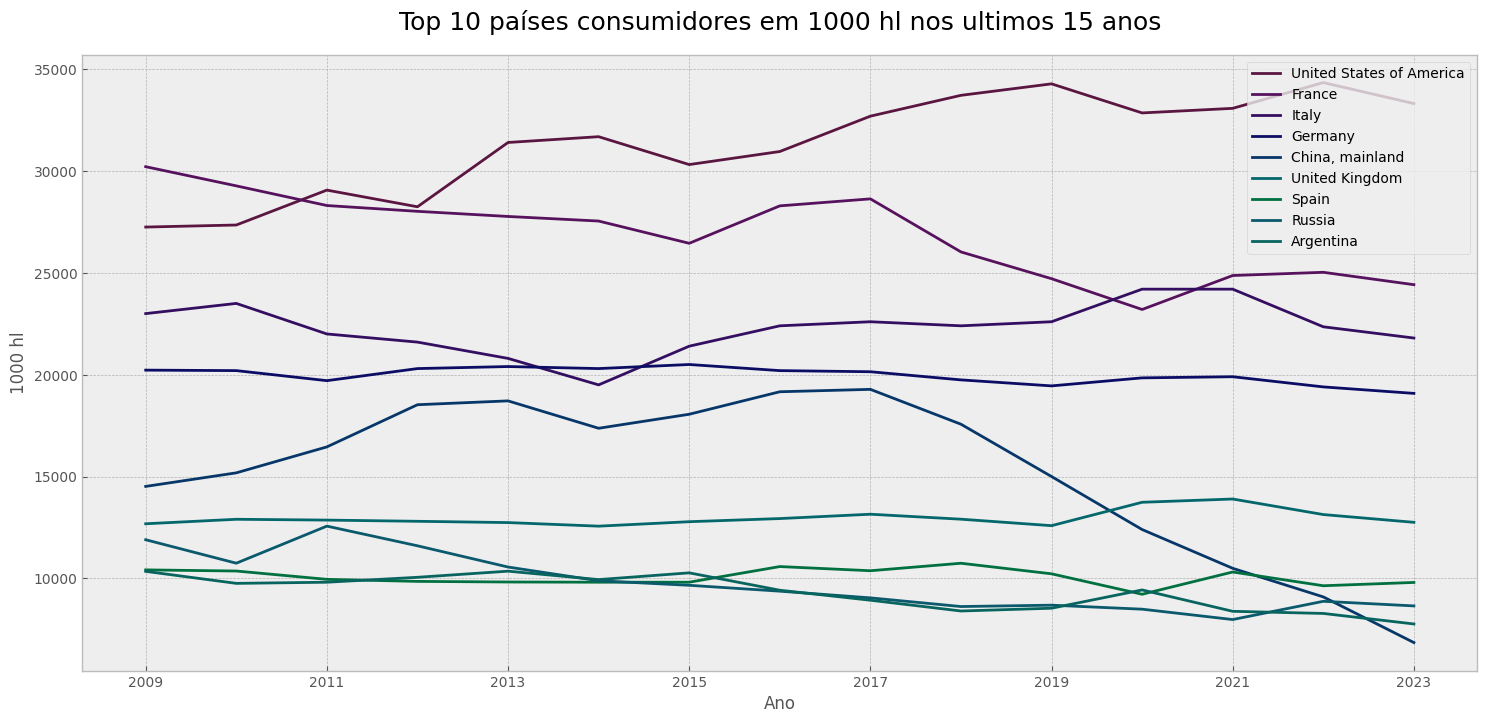

In [474]:
df_oiv_cons = oivVinhoConsumption.sort_values(by="Total", ascending=False).head(10).drop(["Total"], axis=1).iloc[1:].T

colors = ['#5a1640', '#57125e', '#340f61', '#0b0d65', '#073769', '#04676c', '#007041', '#0a596c', '#08645f', '#007041']

axis = df_oiv_cons.plot(figsize=(18,8), color=colors)
axis.set_xlabel('Ano')
axis.set_ylabel('1000 hl')
title_obj = plt.title("Top 10 países consumidores em 1000 hl nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')

plt.savefig('6.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()

### Importação de vinho por país ao longo de 15 anos

In [475]:
oivVinhoImports = pd.pivot_table(oivVinho[oivVinho["Variable"] == 'Imports'], index = 'Region/Country', columns = 'Year', values = 'Quantity')
oivVinhoImports['Total'] = oivVinhoImports.sum(numeric_only=True, axis=1)
oivVinhoImports = oivVinhoImports.fillna(0)
oivVinhoImports.head()

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
Region/Country,,,,,,,,,,,,,,,,
Afghanistan,3.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,15.0
Albania,25.0,25.0,27.0,26.0,22.0,16.0,84.0,41.0,47.0,46.0,49.0,41.0,55.0,54.0,0.0,558.0
Algeria,25.0,17.0,24.0,38.0,56.0,75.0,85.0,113.0,90.0,94.0,58.0,85.0,109.0,105.0,0.0,974.0
American Samoa,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
Angola,798.0,868.0,948.0,1031.0,1003.0,1686.0,1015.0,850.0,1270.0,417.0,353.0,267.0,218.0,407.0,400.0,11531.0


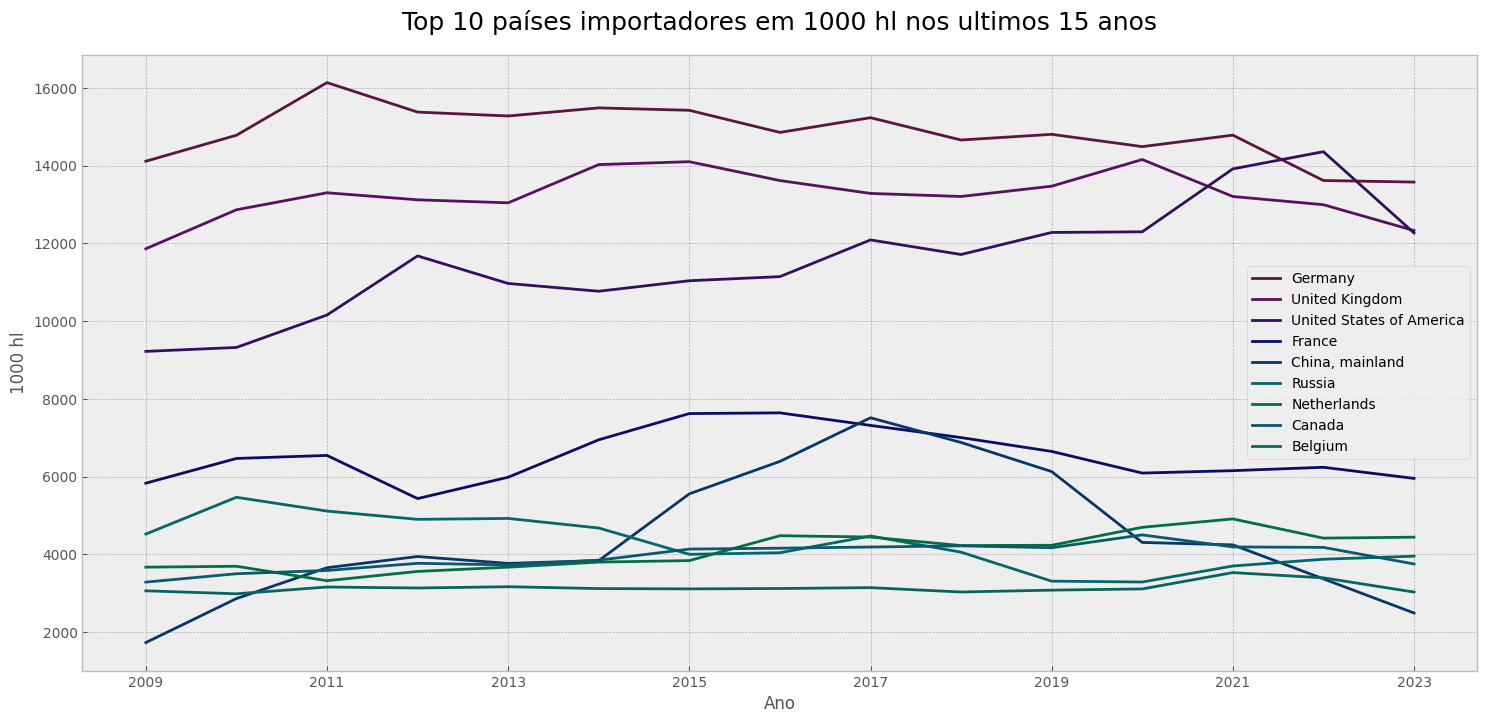

In [476]:
df_oiv_imp = oivVinhoImports.sort_values(by="Total", ascending=False).head(10).drop(["Total"], axis=1).iloc[1:].T

colors = ['#5a1640', '#57125e', '#340f61', '#0b0d65', '#073769', '#04676c', '#007041', '#0a596c', '#08645f', '#007041']

axis = df_oiv_imp.plot(figsize=(18,8), color=colors)
axis.set_xlabel('Ano')
axis.set_ylabel('1000 hl')
title_obj = plt.title("Top 10 países importadores em 1000 hl nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')

plt.savefig('7.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()

### Exportação de vinho por país ao longo de 15 anos

In [477]:
oivVinhoExports = pd.pivot_table(oivVinho[oivVinho["Variable"] == 'Exports'], index = 'Region/Country', columns = 'Year', values = 'Quantity')
oivVinhoExports['Total'] = oivVinhoExports.sum(numeric_only=True, axis=1)
oivVinhoExports = oivVinhoExports.fillna(0)
oivVinhoExports.head()

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
Region/Country,,,,,,,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,7.0,12.0,8.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,0.0,50.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,9.0,23.0,9.0,9.0,54.0,9.0,12.0,4.0,5.0,134.0
Antigua and Barbuda,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Argentina,2830.0,2744.0,3115.0,3656.0,3150.0,2626.0,2675.0,2598.0,2233.0,2754.0,3123.0,3949.0,3345.0,2660.0,1966.0,43424.0


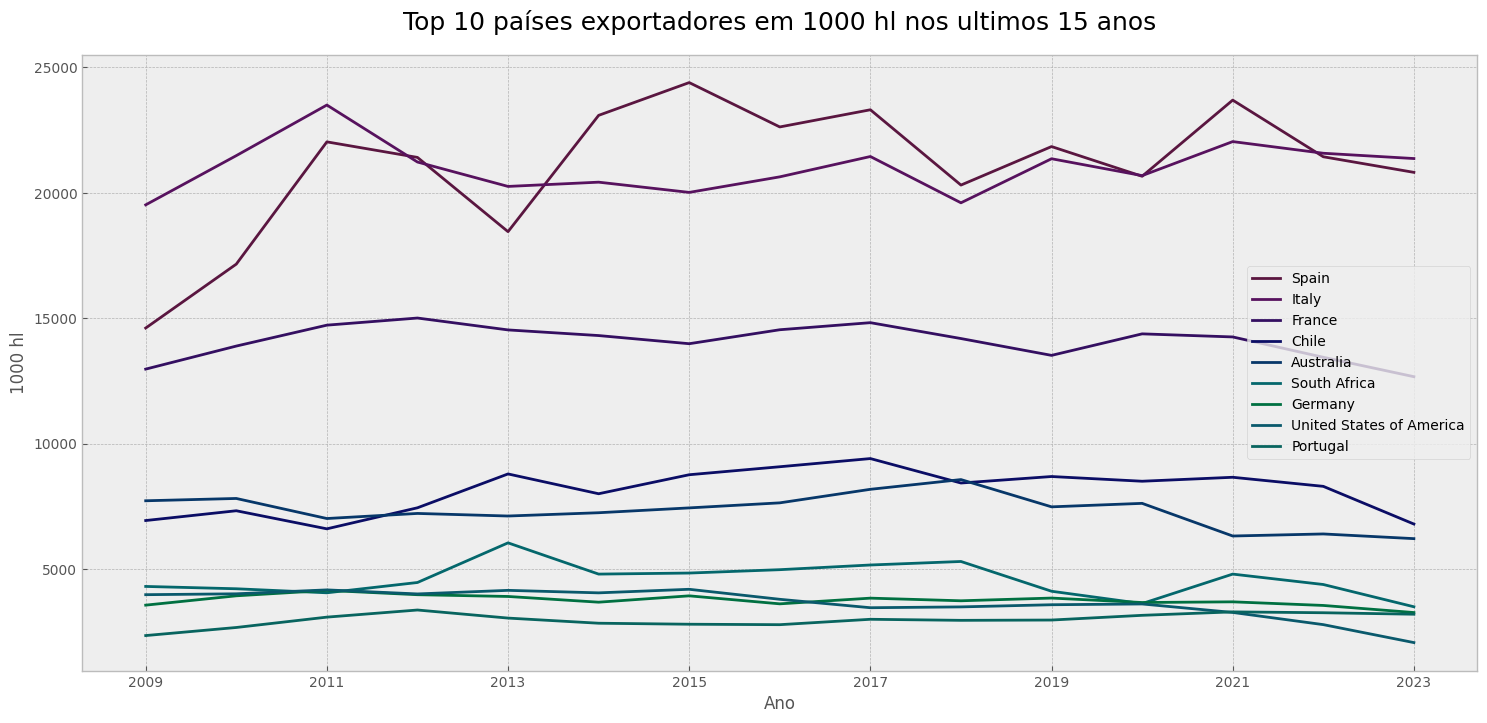

In [478]:
df_oiv_exp = oivVinhoExports.sort_values(by="Total", ascending=False).head(10).drop(["Total"], axis=1).iloc[1:].T

colors = ['#5a1640', '#57125e', '#340f61', '#0b0d65', '#073769', '#04676c', '#007041', '#0a596c', '#08645f', '#007041']

axis = df_oiv_exp.plot(figsize=(18,8), color=colors)
axis.set_xlabel('Ano')
axis.set_ylabel('1000 hl')
title_obj = plt.title("Top 10 países exportadores em 1000 hl nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')

plt.savefig('8.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()

### Produção de vinho por país ao longo de 15 anos

In [479]:
oivVinhoProduction = pd.pivot_table(oivVinho[oivVinho["Variable"] == 'Production'], index = 'Region/Country', columns = 'Year', values = 'Quantity')
oivVinhoProduction['Total'] = oivVinhoProduction.sum(numeric_only=True, axis=1)
oivVinhoProduction = oivVinhoProduction.fillna(0)
oivVinhoProduction.head()

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
Region/Country,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,175.0,181.0,180.0,190.0,180.0,175.0,164.0,178.0,169.0,153.0,187.0,192.0,295.0,228.0,0.0,2647.0
Algeria,588.0,475.0,480.0,492.0,498.0,126.0,96.0,66.0,227.0,193.0,193.0,194.0,183.0,180.0,0.0,3991.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


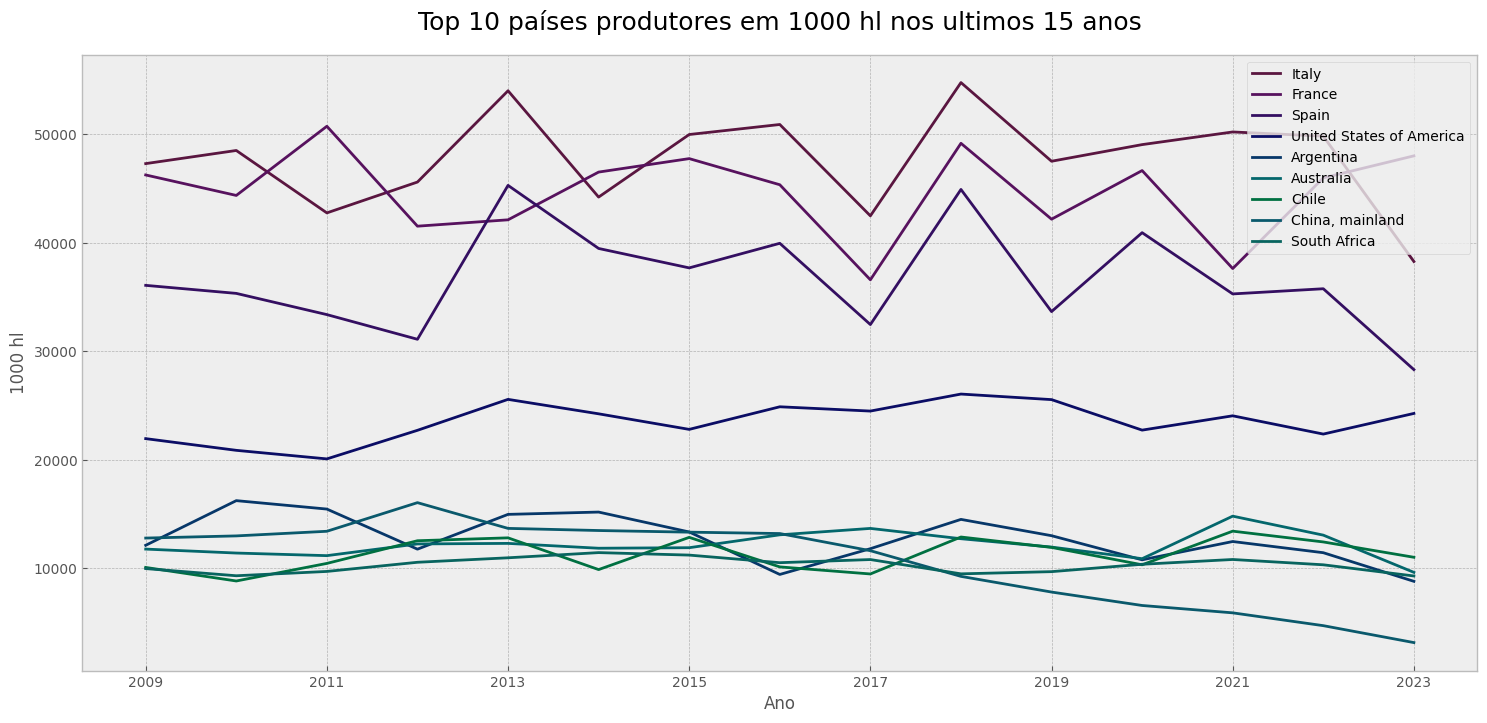

In [480]:
df_oiv_prod = oivVinhoProduction.sort_values(by="Total", ascending=False).head(10).drop(["Total"], axis=1).iloc[1:].T

colors = ['#5a1640', '#57125e', '#340f61', '#0b0d65', '#073769', '#04676c', '#007041', '#0a596c', '#08645f', '#007041']

axis = df_oiv_prod.plot(figsize=(18,8), color=colors)
axis.set_xlabel('Ano')
axis.set_ylabel('1000 hl')
title_obj = plt.title("Top 10 países produtores em 1000 hl nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')

plt.savefig('9.png', bbox_inches='tight', edgecolor='none', facecolor='white')

plt.show()